✔️ 총 추출된 CACS 수: 2274


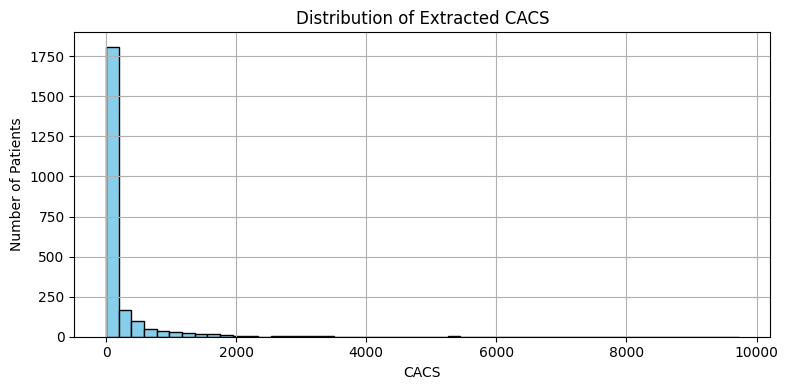

7     1001469308 10275215 허영철 M 1971-09-29 2021-03-2...
8     1001469339 10606476 임만이 F 1972-10-29 2021-04-0...
12    1001477689 10224142 안진희 F 1970-12-21 2021-03-1...
22    1001489731 10037096 장남인 M 1940-02-02 2021-03-1...
27    1001498939 10901254 박유상 F 2000-07-06 2021-03-2...
33    1001503100 10096150 왕희석 M 1960-09-10 2021-04-1...
34    1001503267 10231121 장영철 M 1969-02-27 2021-04-1...
35    1001503569 10245100 서영권 M 1971-12-27 2021-03-2...
36    1001503575 10460293 전소영 F 1974-08-11 2021-03-2...
41    1001508224 10118763 지경숙 F 1964-01-20 2021-03-2...
Name: combined_text, dtype: object

In [7]:
import pandas as pd
import re

# 파일 경로
file_path = "CRE_250078_20250624161454_1750749294731_4399CTdataonly.xlsx"

# openpyxl 엔진으로 엑셀 읽기
df = pd.read_excel(file_path, engine="openpyxl")

# 모든 셀을 텍스트로 합쳐 분석 대상 문자열 생성
df["combined_text"] = df.astype(str).apply(lambda row: " ".join(row), axis=1)

# CACS 추출 함수 정의
def extract_cacs(text):
    pattern = r"(CACS|Ca scoring|calcium score|coronary calcium scoring|CA calcium score)[^\d]*(\d+)"
    match = re.search(pattern, text, re.IGNORECASE)
    if match:
        return int(match.group(2))
    return None

# CACS 컬럼 추출 적용
df["CACS"] = df["combined_text"].apply(extract_cacs)

# 추출된 결과 확인
df_extracted = df[~df["CACS"].isna()].copy()
df_extracted[["CACS"]].describe()

print(f"✔️ 총 추출된 CACS 수: {df_extracted.shape[0]}")

df_extracted[["combined_text", "CACS"]].head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df_extracted["CACS"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Extracted CACS")
plt.xlabel("CACS")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.tight_layout()
plt.show()

df[df["CACS"].isna()]["combined_text"].head(10)
